In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
import os
os.getcwd()

'C:\\Users\\User\\Documents\\Project\\Check Coding Classification EBs 26 Jan 2022'

In [50]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
df =pd.read_csv("L_Type_5_Group.csv", encoding="ISO-8859-1")
df

,P,q,M1,logM1,M2,logM2,R1,logR1,R2,logR2,L1,logL1,L2,logL2,T1,logT1,T2,logT2,Type
0,0.316600,0.0787,1.246,0.095518,0.098,-1.008774,1.347,0.129368,0.409,-0.388277,2.590,0.413300,0.213,-0.671620,8510.137503,3.929937,2511.217871,3.399884,A-EW
1,0.217629,0.6780,0.620,-0.207608,0.420,-0.376751,0.730,-0.136677,0.640,-0.193820,0.110,-0.958607,0.024,-1.619789,3812.000000,3.581153,3135.000000,3.496238,A-EW
2,0.296800,0.1720,1.109,0.044932,0.192,-0.716699,1.148,0.059942,0.507,-0.294992,1.480,0.170262,0.340,-0.468521,6830.684264,3.834464,3142.690027,3.497302,A-EW
3,0.335200,0.1060,1.442,0.158965,0.155,-0.809668,1.521,0.182129,0.561,-0.251037,2.924,0.465977,0.401,-0.396856,9321.521112,3.969487,3445.048673,3.537195,A-EW
4,0.382600,0.1470,1.279,0.106871,0.179,-0.747147,1.435,0.156852,0.583,-0.234331,2.550,0.406540,0.410,-0.387216,8749.612792,3.941989,3531.490806,3.547958,A-EW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11141,0.395610,0.1500,1.730,0.238046,0.270,-0.568636,1.630,0.212188,0.750,-0.124939,6.340,0.802089,1.310,0.117271,7945.000000,3.900094,7966.260000,3.901254,W-EW
11142,0.483170,0.1400,1.620,0.209515,0.220,-0.657577,1.800,0.255273,0.760,-0.119186,4.860,0.686636,1.440,0.158362,7073.000000,3.849604,8020.720000,3.904213,W-EW
11143,0.368450,0.2200,1.390,0.143015,0.310,-0.508638,1.390,0.143015,0.740,-0.130768,2.550,0.406540,0.710,-0.148742,8142.000000,3.910731,8142.950000,3.910782,W-EW
11144,0.498300,0.4420,1.849,0.266937,0.818,-0.087247,1.775,0.249198,1.224,0.087781,5.062,0.704322,2.668,0.426186,11550.680000,4.062608,8172.689581,3.912365,W-EW


In [52]:
len(df)

11146

In [53]:
#เช็ค colums ทั้งหมดของงาน
df.columns

Index(['P', 'q', 'M1', 'logM1', 'M2', 'logM2', 'R1', 'logR1', 'R2', 'logR2',
       'L1', 'logL1', 'L2', 'logL2', 'T1', 'logT1', 'T2', 'logT2', 'Type'],
      dtype='object')

In [54]:
#เช็คประเภทของของข้อมูลในแต่ละคอลัมน์
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11146 entries, 0 to 11145
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P       11146 non-null  float64
 1   q       11146 non-null  float64
 2   M1      11146 non-null  float64
 3   logM1   11146 non-null  float64
 4   M2      11146 non-null  float64
 5   logM2   11146 non-null  float64
 6   R1      11146 non-null  float64
 7   logR1   11146 non-null  float64
 8   R2      11146 non-null  float64
 9   logR2   11146 non-null  float64
 10  L1      11146 non-null  float64
 11  logL1   11146 non-null  float64
 12  L2      11146 non-null  float64
 13  logL2   11146 non-null  float64
 14  T1      11146 non-null  float64
 15  logT1   11146 non-null  float64
 16  T2      11146 non-null  float64
 17  logT2   11146 non-null  float64
 18  Type    11146 non-null  object 
dtypes: float64(18), object(1)
memory usage: 1.6+ MB


In [55]:
#เช็คประภทของดาวคู่ที่พิจารณาจากโรชซ์โมเดล
df.Type.value_counts()

EA      6372
W-EW    1832
EB      1034
A-EW     997
EW       911
Name: Type, dtype: int64

In [56]:
from sklearn.cluster import KMeans

In [57]:
x = df[['P', 'q', 'M1', 'logM1', 'M2', 'logM2', 'R1', 'logR1',
       'R2', 'logR2', 'L1', 'logL1', 'L2', 'logL2', 'T1', 'logT1', 'T2',
       'logT2']]

In [58]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [59]:
model.fit(x)

KMeans(n_clusters=3)

In [60]:
model.cluster_centers_

array([[ 9.13393883e+00,  3.78929360e-01,  2.23386499e+00,
         2.70800329e-01,  9.40209907e-01, -2.26098870e-01,
         2.29788542e+00,  2.61249447e-01,  2.59213511e+00,
         2.23015154e-01,  2.94781271e+02,  9.96587391e-01,
         1.06351170e+02,  4.46035278e-01,  7.94287372e+03,
         3.87782064e+00,  5.96683099e+03,  3.76121404e+00],
       [ 3.47460643e+00,  6.48518519e-01,  1.87555556e+01,
         1.23153656e+00,  1.31066667e+01,  9.88590564e-01,
         9.32222222e+00,  9.49992181e-01,  8.91851852e+00,
         9.32583065e-01,  1.97010384e+05,  5.27044895e+00,
         5.06769050e+04,  3.99927908e+00,  2.87592593e+04,
         4.42172883e+00,  2.50969630e+04,  4.32168819e+00],
       [ 2.84578976e+00,  8.19000000e-01,  2.30040000e+01,
         1.35248731e+00,  1.89960000e+01,  1.26067698e+00,
         1.48000000e+01,  1.14076500e+00,  1.52800000e+01,
         1.16453317e+00,  1.62971580e+05,  5.10637115e+00,
         2.66887380e+05,  5.42211355e+00,  3.26182000e

In [61]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
df['Type'].values

array(['A-EW', 'A-EW', 'A-EW', ..., 'W-EW', 'W-EW', 'W-EW'], dtype=object)

In [63]:
pd.crosstab((df['Type']),model.labels_)

col_0,0,1,2
Type,,,
A-EW,997,0,0
EA,6356,13,3
EB,1017,10,7
EW,907,4,0
W-EW,1832,0,0


In [64]:
x = df.iloc[:,3:5].values

In [65]:
x

array([[ 0.09551804,  0.098     ],
       [-0.20760831,  0.42      ],
       [ 0.04493155,  0.192     ],
       ...,
       [ 0.1430148 ,  0.31      ],
       [ 0.26693691,  0.818     ],
       [ 0.13987909,  0.21      ]])

In [66]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [67]:
wcss

[41296.56004471986,
 15072.867641850009,
 9050.549768894738,
 5482.548648889326,
 3752.4453794513165,
 2872.294622701471,
 2107.866725426728,
 1507.9106207570053,
 1234.8035294382694,
 968.4841297468334]

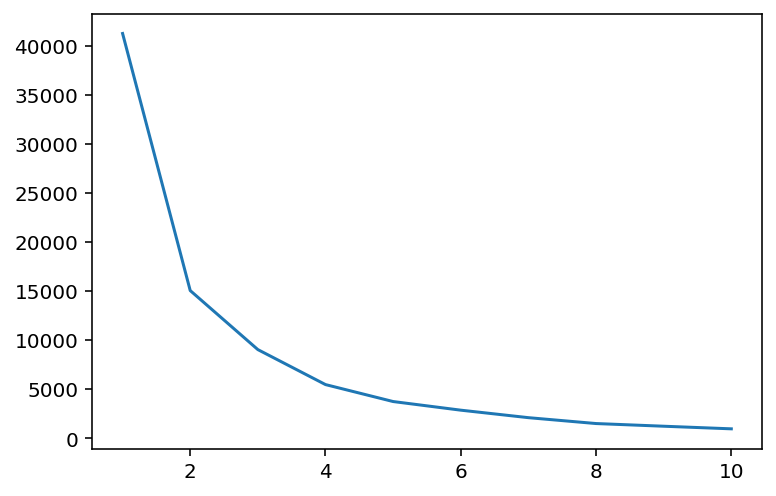

In [68]:
plt.plot(range(1,11),wcss)

In [69]:
kmeans = KMeans(n_clusters=3,init='k-means++')
y_means = kmeans.fit_predict(x)

In [70]:
y_means

array([1, 1, 1, ..., 1, 1, 1])

In [71]:
pd.concat([df,pd.DataFrame(y_means)],axis=1)

,P,q,M1,logM1,M2,logM2,R1,logR1,R2,logR2,L1,logL1,L2,logL2,T1,logT1,T2,logT2,Type,0
0,0.316600,0.0787,1.246,0.095518,0.098,-1.008774,1.347,0.129368,0.409,-0.388277,2.590,0.413300,0.213,-0.671620,8510.137503,3.929937,2511.217871,3.399884,A-EW,1
1,0.217629,0.6780,0.620,-0.207608,0.420,-0.376751,0.730,-0.136677,0.640,-0.193820,0.110,-0.958607,0.024,-1.619789,3812.000000,3.581153,3135.000000,3.496238,A-EW,1
2,0.296800,0.1720,1.109,0.044932,0.192,-0.716699,1.148,0.059942,0.507,-0.294992,1.480,0.170262,0.340,-0.468521,6830.684264,3.834464,3142.690027,3.497302,A-EW,1
3,0.335200,0.1060,1.442,0.158965,0.155,-0.809668,1.521,0.182129,0.561,-0.251037,2.924,0.465977,0.401,-0.396856,9321.521112,3.969487,3445.048673,3.537195,A-EW,1
4,0.382600,0.1470,1.279,0.106871,0.179,-0.747147,1.435,0.156852,0.583,-0.234331,2.550,0.406540,0.410,-0.387216,8749.612792,3.941989,3531.490806,3.547958,A-EW,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11141,0.395610,0.1500,1.730,0.238046,0.270,-0.568636,1.630,0.212188,0.750,-0.124939,6.340,0.802089,1.310,0.117271,7945.000000,3.900094,7966.260000,3.901254,W-EW,1
11142,0.483170,0.1400,1.620,0.209515,0.220,-0.657577,1.800,0.255273,0.760,-0.119186,4.860,0.686636,1.440,0.158362,7073.000000,3.849604,8020.720000,3.904213,W-EW,1
11143,0.368450,0.2200,1.390,0.143015,0.310,-0.508638,1.390,0.143015,0.740,-0.130768,2.550,0.406540,0.710,-0.148742,8142.000000,3.910731,8142.950000,3.910782,W-EW,1
11144,0.498300,0.4420,1.849,0.266937,0.818,-0.087247,1.775,0.249198,1.224,0.087781,5.062,0.704322,2.668,0.426186,11550.680000,4.062608,8172.689581,3.912365,W-EW,1


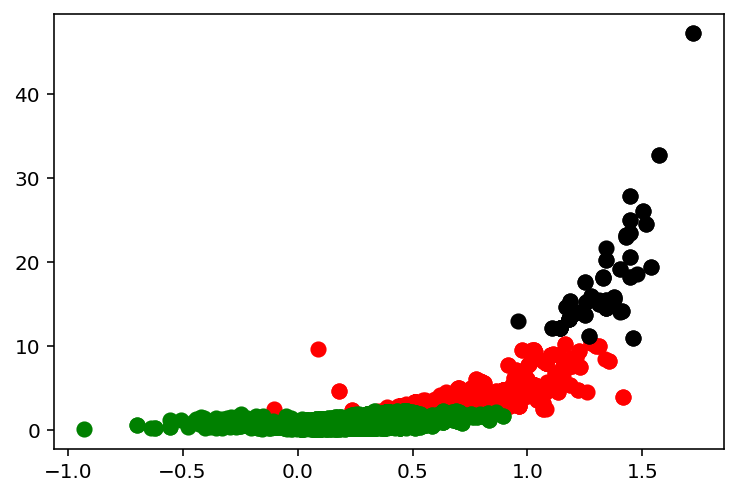

In [72]:
plt.scatter(x[y_means==0,0], x[y_means==0,1], s=50,c='red')
plt.scatter(x[y_means==1,0], x[y_means==1,1], s=50,c='green')
plt.scatter(x[y_means==2,0], x[y_means==2,1], s=50,c='black')
plt.scatter(x[y_means==3,0], x[y_means==3,1], s=50,c='blue')
plt.scatter(x[y_means==4,0], x[y_means==4,1], s=50,c='purple')
plt.scatter(x[y_means==5,0], x[y_means==5,1], s=50,c='yellow')

